In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime # Import the datetime module

url = "https://docs.google.com/spreadsheets/d/1IpmICPs8tsDmpKqFXqPpQRBzmdAOTK4v4Lny-KyHD8M/export?format=csv&gid=1950957744"
df_raw = pd.read_csv(url)
df_raw['birth_date'] = pd.to_datetime(df_raw['birth_date'], errors='coerce')
initial_rows = df_raw.shape[0]
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12559 non-null  int64         
 1   account_activity_level   12559 non-null  object        
 2   customer_value_level     12559 non-null  object        
 3   MOB                      12559 non-null  int64         
 4   flag_female              12559 non-null  int64         
 5   avg_sales_L36M           11820 non-null  float64       
 6   cnt_sales_L36M           12559 non-null  int64         
 7   last_sales               12559 non-null  int64         
 8   month_since_last_sales   12559 non-null  int64         
 9   count_direct_promo_L12M  12559 non-null  int64         
 10  birth_date               12559 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 1.1+ MB


In [418]:
df_raw.head(20)

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91,0,25000.0,1,25000,26,5,1996-11-03
1,100000038,X,A,69,0,9000.0,5,10000,25,10,1971-04-24
2,100000382,X,A,123,1,17330.0,6,20000,18,6,1953-01-16
3,100000612,X,A,84,1,25830.0,6,25000,14,7,1997-06-07
4,100000757,X,A,40,0,25000.0,3,25000,17,5,1989-09-13
5,100000932,X,A,45,1,9000.0,4,10000,18,6,1971-11-05
6,100000996,X,A,105,1,10000.0,5,10000,19,6,1975-01-06
7,100001201,X,A,41,0,25000.0,2,25000,24,3,1973-09-04
8,100001304,X,A,126,1,17500.0,2,20000,17,6,1947-03-02
9,100001339,X,A,70,1,9800.0,4,10000,18,3,1951-06-14


Step 3A Hapus data tidak relevan

In [419]:
# Filter data
import datetime # Import the datetime module
df = df_raw.copy()
df = df[(df['birth_date'].dt.year >= 1900) & (df['birth_date'].dt.year <= 2023)]
ref_date = datetime.datetime(2023, 5, 31)
df["age"] = (ref_date - df["birth_date"]).dt.days // 365
df = df[df["account_activity_level"].isin(["X", "Y", "Z"])]

df = df[df["age"] >= 21]
df = df[df['MOB'] >= 0]
df = df.drop(columns=['last_sales'])
irrelevant_rows = df.shape[0]

Step 3B (Missing Value & Remove Duplicates)

In [420]:
# Cek apakah ada baris duplikat
df = df.drop_duplicates()


In [421]:
df["avg_sales_L36M"] = df["avg_sales_L36M"].fillna(df["avg_sales_L36M"].mean())
missing_rows = df.shape[0]

Step 3c: Konversi tipe data

In [422]:
df["account_id"] = df["account_id"].astype(str)
df["cnt_sales_L36M"] = df["cnt_sales_L36M"].astype(int)
df["count_direct_promo_L12M"] = df["count_direct_promo_L12M"].astype(int)
df["avg_sales_L36M"] = df["avg_sales_L36M"].astype(float)
duplicated_rows = df.shape[0]

Step 4: Hitung usia dan hapus pelanggan di bawah 21 tahun per 31 Mei 2023

In [423]:
import datetime
df["age"] = (ref_date - df["birth_date"]).dt.days // 365
age_rows = df.shape[0]

In [424]:
final_rows = df.shape[0]
initial_rows,final_rows

(12559, 12356)

Buat ringkasan hasil data cleaning

In [425]:
summary_data_cleaning = {
    "Data Cleaning Steps": [
        "Remove irrelevant data (step 3a)",
        "Treat missing values (step 3b)",
        "Treat duplicates (step 3b)",
        "Convert to the correct data type (step 3c)",
        "Remove all clients with age < 21 (step 4)"
    ],
    "Original Data": [
        initial_rows,
        irrelevant_rows,
        missing_rows,
        duplicated_rows,
        duplicated_rows
    ],
    "After Cleaning": [
        irrelevant_rows,
        missing_rows,
        duplicated_rows,
        duplicated_rows,
        age_rows
    ],
    "Reason to do this data cleaning step": [
        "Remove negative/zero values, negative MOB, and incorrect birth_date",
        "Handle missing values (if any)",
        "Remove duplicate account_id",
        "Ensure correct data types for analysis",
        "Ensure clients are at least 21 years old"
    ]
}

In [426]:
summary_df = pd.DataFrame(summary_data_cleaning)
summary_df

,Data Cleaning Steps,Original Data,After Cleaning,Reason to do this data cleaning step
0,Remove irrelevant data (step 3a),12559,12428,"Remove negative/zero values, negative MOB, and..."
1,Treat missing values (step 3b),12428,12356,Handle missing values (if any)
2,Treat duplicates (step 3b),12356,12356,Remove duplicate account_id
3,Convert to the correct data type (step 3c),12356,12356,Ensure correct data types for analysis
4,Remove all clients with age < 21 (step 4),12356,12356,Ensure clients are at least 21 years old


In [427]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Define the file path in Google Drive
# file_path = "/content/drive/My Drive/data_cleanedMilestone2.csv"

# # Save DataFrame to CSV
# df.to_csv(file_path, index=False)

# print(f"✅ CSV file saved to: {file_path}")

#milestone 2

In [428]:
df["total_sales_L36M"] = df["avg_sales_L36M"] * df["cnt_sales_L36M"]

total_sales = df["total_sales_L36M"].sum()
print(f"Total Sales in Last 3 Years: {total_sales:,.0f}")
activity_summary = df.groupby("account_activity_level").agg({
    "total_sales_L36M": "mean",
    "cnt_sales_L36M": "mean"
}).reset_index()

Total Sales in Last 3 Years: 402,580,520


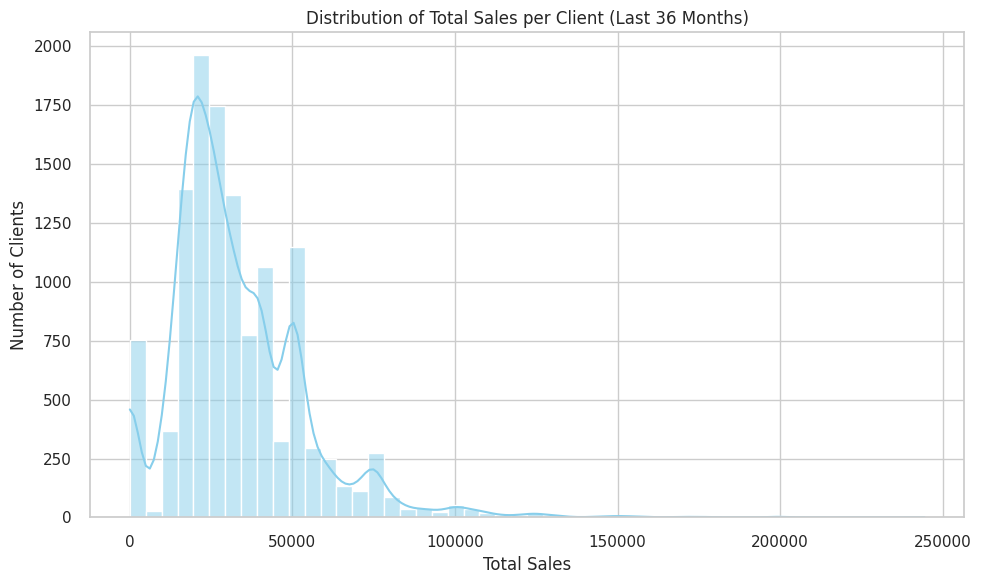

In [429]:
# --- Visualisasi Distribusi Total Sales ---
plt.figure(figsize=(10, 6))
sns.histplot(df["total_sales_L36M"], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Total Sales per Client (Last 36 Months)")
plt.xlabel("Total Sales")
plt.ylabel("Number of Clients")
plt.grid(True)
plt.tight_layout()
plt.show()

In [430]:
clients_no_sales = df[df["total_sales_L36M"] == 0]
num_clients_no_sales = len(clients_no_sales)
percentage_no_sales = (num_clients_no_sales / len(df)) * 100

Total Sales dalam 3 tahun terakhir

 Jumlah klien tanpa transaksi dalam 36 bulan terakhir

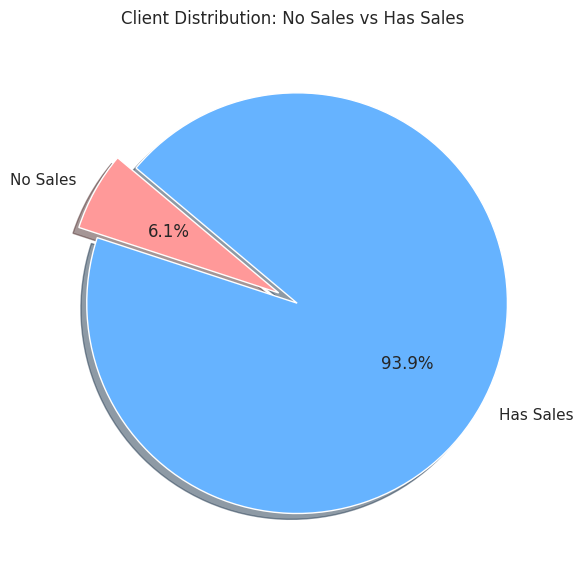

In [431]:
labels = ['No Sales', 'Has Sales']
sizes = [num_clients_no_sales, len(df) - num_clients_no_sales]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Client Distribution: No Sales vs Has Sales')
plt.axis('equal')
plt.tight_layout()
plt.show()



aktivitas akun berdasarkan level

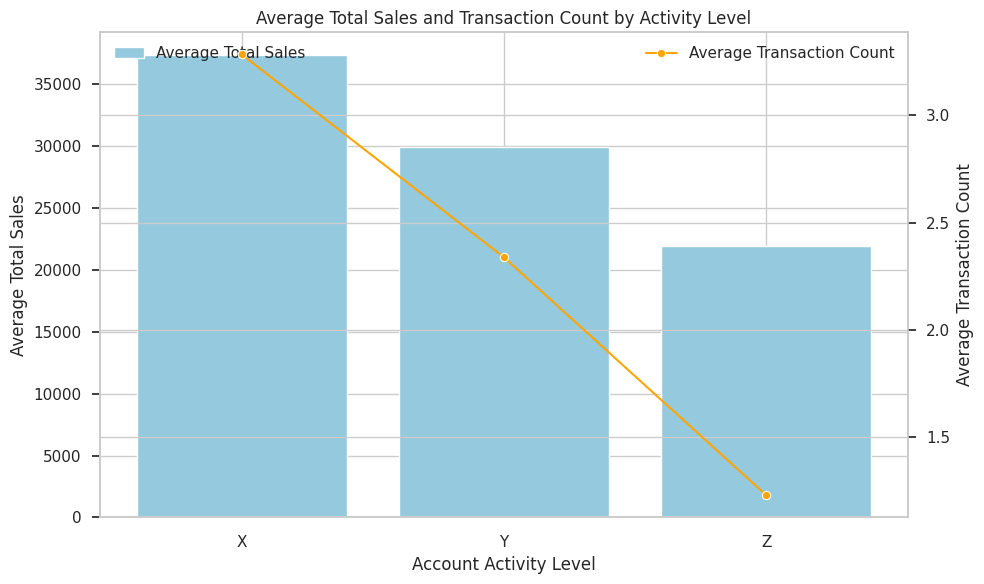

In [432]:
# Visualisasi bar chart untuk rata-rata total sales dan transaksi
fig, ax1 = plt.subplots(figsize=(10, 6))


# Bar chart untuk rata-rata total penjualan
sns.barplot(
    x="account_activity_level",
    y="total_sales_L36M",
    data=activity_summary,
    ax=ax1,
    color="skyblue",
    label="Average Total Sales"
)

# Axis kedua: line chart untuk jumlah transaksi
ax2 = ax1.twinx()
sns.lineplot(
    x="account_activity_level",
    y="cnt_sales_L36M",
    data=activity_summary,
    ax=ax2,
    color="orange",
    marker="o",
    label="Average Transaction Count"
)

# Tambahkan label dan judul
ax1.set_title("Average Total Sales and Transaction Count by Activity Level")
ax1.set_ylabel("Average Total Sales")
ax2.set_ylabel("Average Transaction Count")
ax1.set_xlabel("Account Activity Level")
ax1.grid(True)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

<ipython-input-433-201f5fd95dfa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="profit", palette="Set2")


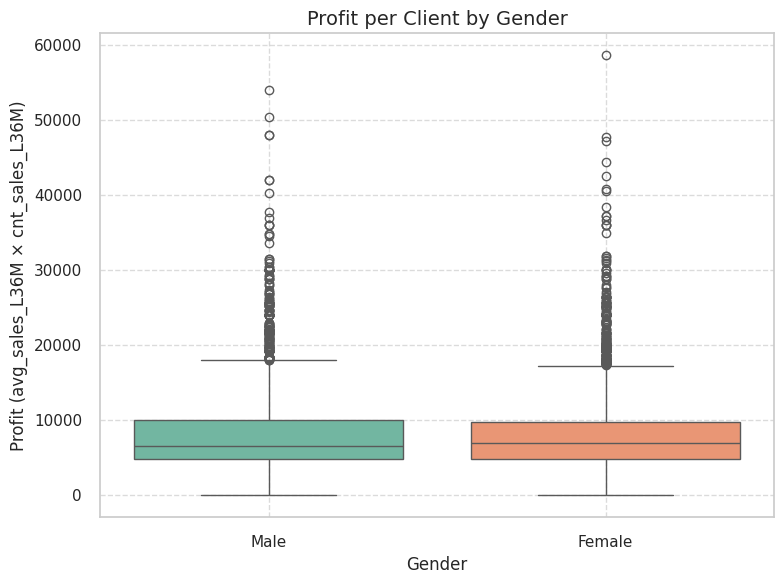

In [433]:
# Hitung profit per client
df["profit"] = 0.24 * df["total_sales_L36M"]

# Mapping gender
df["gender"] = df["flag_female"].map({1: "Female", 0: "Male"})

# Visualisasi boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="gender", y="profit", palette="Set2")
plt.title("Profit per Client by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Profit (avg_sales_L36M × cnt_sales_L36M)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-434-b30b3e397332>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="gender", y="profit", palette="Set2")


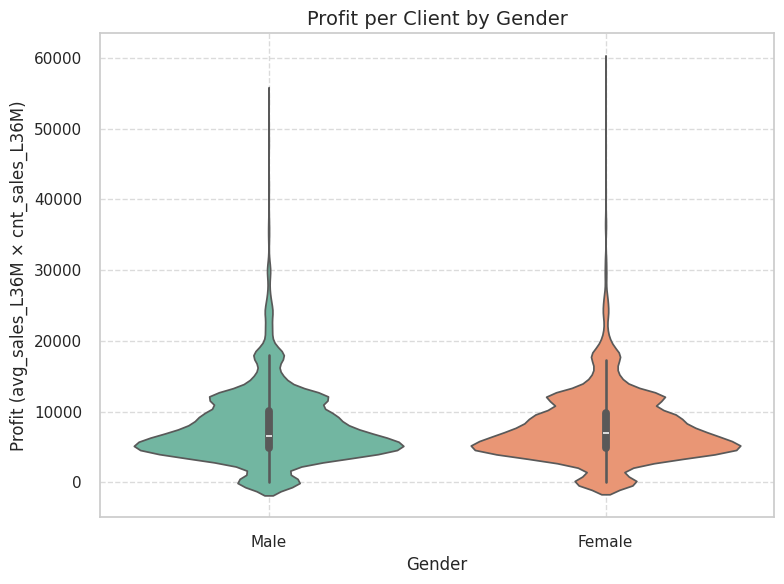

In [434]:
# Visualisasi boxplot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="gender", y="profit", palette="Set2")
plt.title("Profit per Client by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Profit (avg_sales_L36M × cnt_sales_L36M)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-435-fa8d384f9859>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_profit, x="flag_female", y="total_sales", palette=["blue", "pink"])


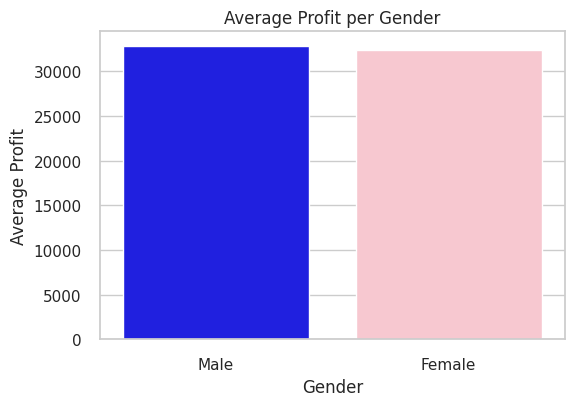

In [435]:
df.rename(columns={"total_sales_L36M": "total_sales"}, inplace=True)

# Calculate the average profit using the new "total_sales" column
avg_profit = df.groupby("flag_female")["total_sales"].mean().reset_index()

# Continue with visualization (rest of your original code)
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_profit, x="flag_female", y="total_sales", palette=["blue", "pink"])
plt.xticks([0, 1], ["Male", "Female"])
plt.title("Average Profit per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Profit")
plt.show()

<ipython-input-436-3c6983103eb8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flag_female"] == 0]["total_sales"], label="Male", shade=True, color="blue")
<ipython-input-436-3c6983103eb8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flag_female"] == 1]["total_sales"], label="Female", shade=True, color="pink")


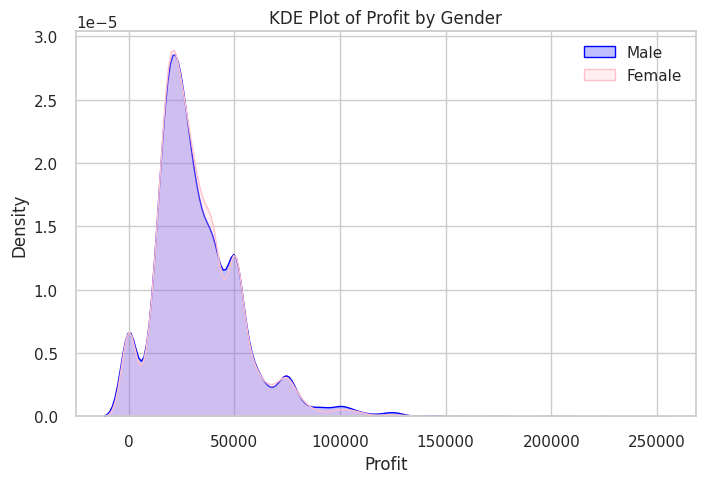

In [436]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["flag_female"] == 0]["total_sales"], label="Male", shade=True, color="blue")
sns.kdeplot(df[df["flag_female"] == 1]["total_sales"], label="Female", shade=True, color="pink")
plt.title("KDE Plot of Profit by Gender")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.legend()
plt.show()

In [437]:
total_sales_sum = df["total_sales"].sum()  # Use 'total_sales' instead of 'total_sales_L36M'

# Calculate percentage of clients with no sales and assign to no_sales_percentage
clients_no_sales = df[df["total_sales"] == 0]  # Use 'total_sales' instead of 'total_sales_L36M'
num_clients_no_sales = len(clients_no_sales)
no_sales_percentage = (num_clients_no_sales / len(df)) * 100

summary_analysis = {
    "Total Sales in Last 3 Years": total_sales_sum,
    "Clients with No Sales (%)": no_sales_percentage
}

summary_analysis

{'Total Sales in Last 3 Years': np.float64(402580520.0),
 'Clients with No Sales (%)': 6.069925542246682}

Proporsi Total Sales berdasarkan Generasi

In [438]:
df["birth_year"] = pd.to_datetime(df["birth_date"]).dt.year

def categorize_generation(year):
    if year >= 2013:
        return "Gen-Alpha"
    elif year >= 1997:
        return "Gen-Z"
    elif year >= 1981:
        return "Millennial"
    elif year >= 1965:
        return "Gen-X"
    elif year >= 1946:
        return "Boomer"
    else:
        return "Pre-Boomer"  # opsional kalau ada data lahir sebelum 1946



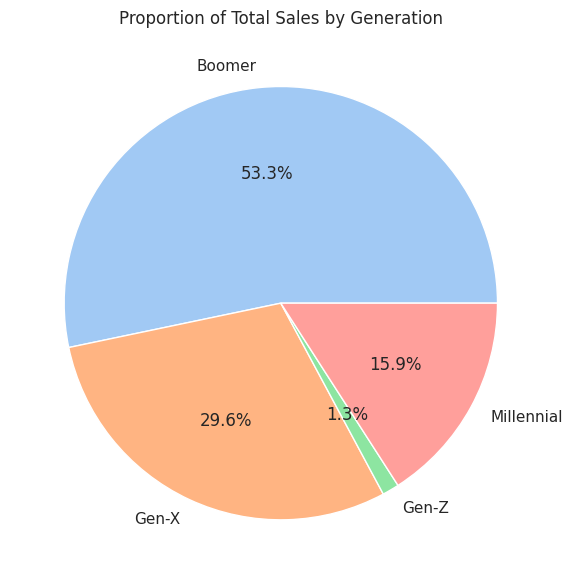

In [439]:

# Terapkan fungsi ke kolom birth_year
df["generation"] = df["birth_year"].apply(categorize_generation)

# Hitung total sales 3 tahun terakhir (pastikan sudah difilter sebelumnya)
sales_by_gen = df.groupby("generation")["total_sales"].sum().reset_index()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sales_by_gen["total_sales"],
    labels=sales_by_gen["generation"],
    autopct='%1.1f%%',
    colors=sns.color_palette("pastel")
)
plt.title("Proportion of Total Sales by Generation")
plt.tight_layout()
plt.show()

# Simpan hasil dalam dictionary (optional)
sales_by_gen_dict = sales_by_gen.set_index("generation")["total_sales"].to_dict()


<ipython-input-440-2d3c72a993ac>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_promo_sales = df.groupby("promo_group")["total_sales"].mean().reset_index()


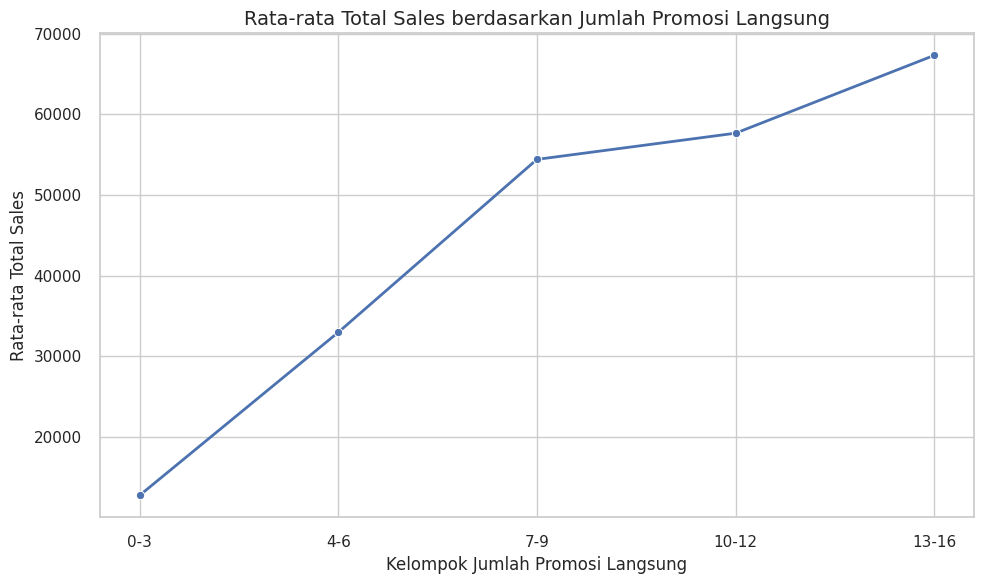

  promo_group   total_sales
0         0-3  12778.123342
1         4-6  32989.601034
2         7-9  54420.544959
3       10-12  57668.923077
4       13-16  67317.142857


In [440]:
# Hitung total_sales jika belum ada
df["total_sales"] = df["avg_sales_L36M"] * df["cnt_sales_L36M"]

# Buat bin sesuai nilai maksimum dari count_direct_promo_L12M
bins = [0, 3, 6, 9, 12, 16]
labels = ['0-3', '4-6', '7-9', '10-12', '13-16']

# Kelompokkan jumlah komunikasi promosi
df["promo_group"] = pd.cut(df["count_direct_promo_L12M"], bins=bins, labels=labels, include_lowest=True)

# Hitung rata-rata total sales per kelompok
grouped_promo_sales = df.groupby("promo_group")["total_sales"].mean().reset_index()

# Visualisasi line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_promo_sales, x="promo_group", y="total_sales", marker="o", linewidth=2)
plt.title("Rata-rata Total Sales berdasarkan Jumlah Promosi Langsung", fontsize=14)
plt.xlabel("Kelompok Jumlah Promosi Langsung", fontsize=12)
plt.ylabel("Rata-rata Total Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Menampilkan data numerik (opsional)
print(grouped_promo_sales)

Hubungan antara jumlah promosi langsung (email, SMS) dengan total sales

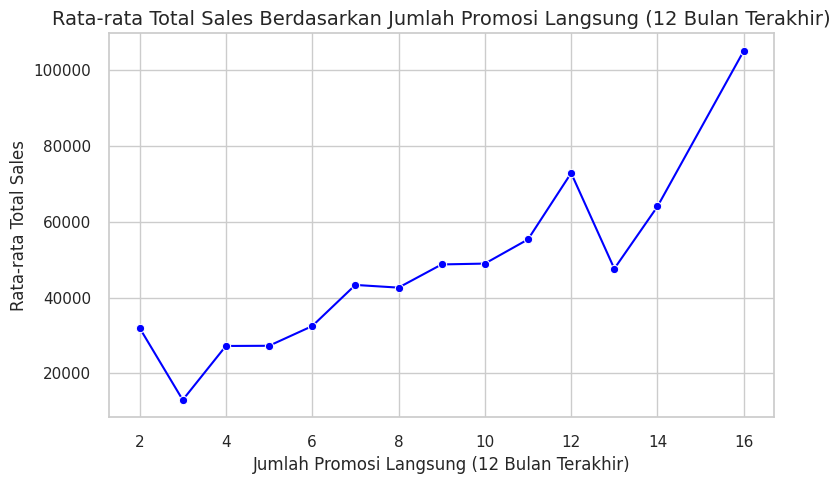

In [441]:
df_recent = df[df["month_since_last_sales"] <= 12].copy()

# Hitung rata-rata total_sales berdasarkan jumlah promosi langsung
promo_sales = df_recent.groupby("count_direct_promo_L12M")["total_sales"].mean().reset_index()

# Visualisasi line chart
plt.figure(figsize=(8, 5))
sns.lineplot(data=promo_sales, x="count_direct_promo_L12M", y="total_sales", marker="o", color="blue")
plt.title("Rata-rata Total Sales Berdasarkan Jumlah Promosi Langsung (12 Bulan Terakhir)", fontsize=14)
plt.xlabel("Jumlah Promosi Langsung (12 Bulan Terakhir)", fontsize=12)
plt.ylabel("Rata-rata Total Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [442]:
from google.colab import drive
drive.mount('/content/drive')

# Define the file path in Google Drive
file_path = "/content/drive/My Drive/data_cleanedforMilestone3.csv"

# Save DataFrame to CSV
df.to_csv(file_path, index=False)

print(f"✅ CSV file saved to: {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ CSV file saved to: /content/drive/My Drive/data_cleanedforMilestone3.csv


#coba lagi milestones 3


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

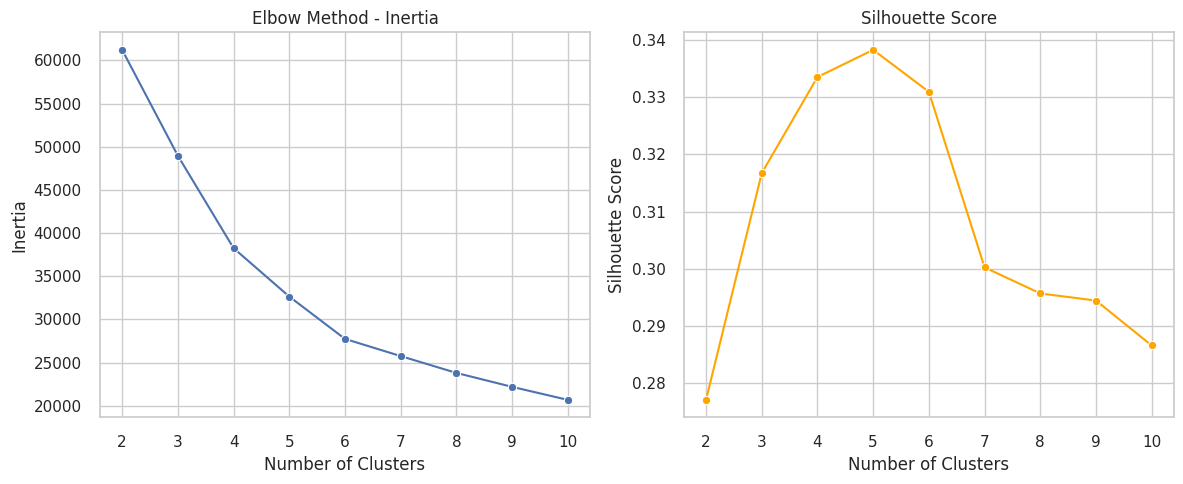

In [475]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pilih fitur numerik untuk clustering
features = [
    'avg_sales_L36M',
    'cnt_sales_L36M',
    'month_since_last_sales',
    'total_sales',
    'profit',
    'MOB',
    'count_direct_promo_L12M'
]
# Buat kolom tambahan
df['count_sales'] = df['cnt_sales_L36M']
df['revenue'] = df['total_sales']  # diasumsikan revenue = total_sales
df['has_sales'] = df['cnt_sales_L36M'].apply(lambda x: 1 if x > 0 else 0)

# Buang missing values
df_clustering = df[features].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
    plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x=list(K_range), y=inertia, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
sns.lineplot(x=list(K_range), y=silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Fitur untuk Clustering ---
features = ['total_sales', 'count_sales', 'revenue', 'profit']
df_features = df[features]

# Standardisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# KMeans Clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Tambahkan hasil cluster
df_clustered = df.copy()
df_clustered['cluster'] = clusters

# --- Ringkasan per Cluster ---
cluster_summary = df_clustered.groupby('cluster').agg(
    total_sales_mean=('total_sales', 'mean'),
    total_sales_sum=('total_sales', 'sum'),
    count_sales_mean=('count_sales', 'mean'),
    count_sales_sum=('count_sales', 'sum'),
    revenue_mean=('revenue', 'mean'),
    revenue_sum=('revenue', 'sum'),
    profit_mean=('profit', 'mean'),
    profit_sum=('profit', 'sum'),
    account_count=('account_id', 'count'),
    has_sales_mean=('has_sales', lambda x: round((x == 0).sum() / len(x), 2))  # proporsi tanpa sales
).reset_index()

# Tambahkan label klaster (berdasarkan total_sales_mean)
cluster_summary.sort_values('total_sales_mean', ascending=False, inplace=True)
cluster_summary['cluster_label'] = ['High Value', 'Mid Value', 'Low Value']
cluster_summary.sort_values('cluster', inplace=True)

# --- Bar Chart Visualisasi ---
plt.figure(figsize=(14, 6))

# Total Sales
plt.subplot(1, 2, 1)
sns.barplot(data=cluster_summary, x='cluster', y='total_sales_mean', palette='Blues')
plt.title('Average Total Sales per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Total Sales')

# Profit
plt.subplot(1, 2, 2)
sns.barplot(data=cluster_summary, x='cluster', y='profit_mean', palette='Greens')
plt.title('Average Profit per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Profit')

plt.tight_layout()
plt.show()

# --- Radar Chart Visualisasi ---
# Siapkan data
radar_data = cluster_summary[[
    'total_sales_mean', 'profit_mean', 'count_sales_mean', 'has_sales_mean'
]]
radar_data.columns = ['Total Sales', 'Profit', 'Count Sales', 'No Sales Proporsi']
radar_data.index = cluster_summary['cluster'].astype(str)

# Normalisasi (0-1)
radar_norm = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())
radar_norm['Cluster'] = radar_norm.index

# Radar Chart Plot
categories = list(radar_norm.columns[:-1])
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in radar_norm.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
ax.set_ylim(0, 1)
plt.title('Radar Chart Profil Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()


   cluster  total_sales_mean  total_sales_sum  count_sales_mean  \
0        0      40467.318038      204602760.0          3.690467   
1        1      17703.556202      109620420.0          1.245317   
2        2      79744.891697       88357340.0          5.781588   

   count_sales_sum  revenue_mean  revenue_sum   profit_mean  profit_sum  \
0            18659  40467.318038  204602760.0   9712.156329  49104662.4   
1             7711  17703.556202  109620420.0   4248.853488  26308900.8   
2             6406  79744.891697   88357340.0  19138.774007  21205761.6   

   account_id_count  has_sales_<lambda> cluster_label  
0              5056                1.00    High Value  
1              6192                0.88     Low Value  
2              1108                1.00     Mid Value  


<ipython-input-476-99d6345e8705>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster', y='total_sales_mean', palette='Blues')
<ipython-input-476-99d6345e8705>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster', y='profit_mean', palette='Greens')


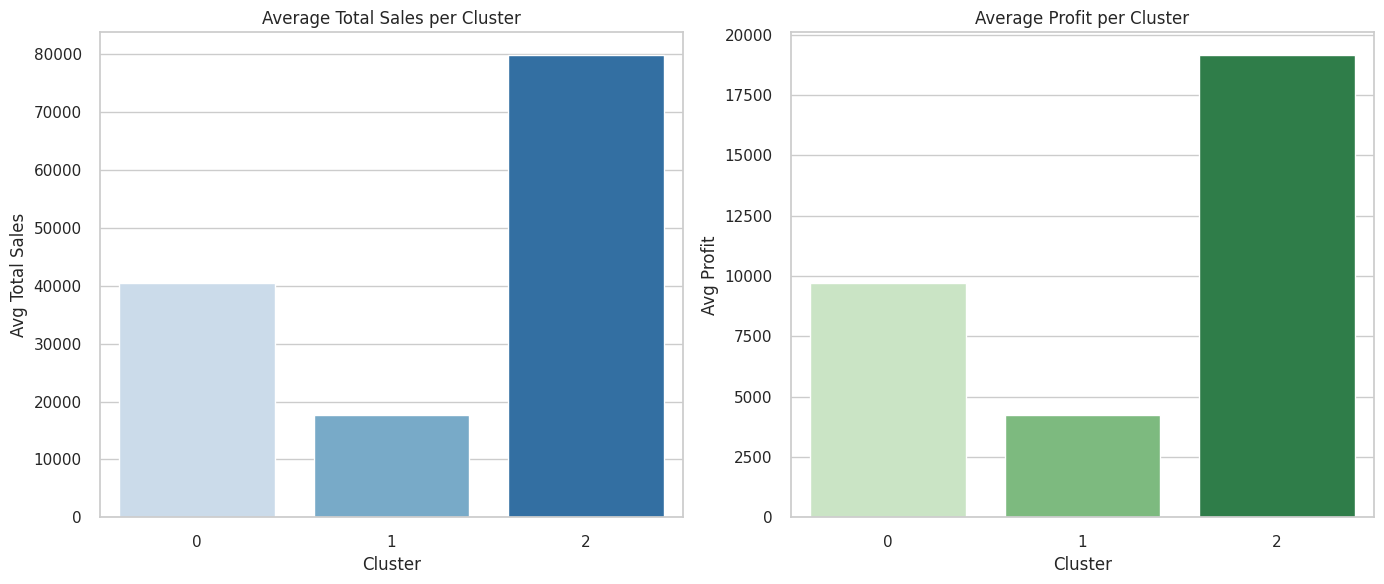

In [476]:

# Buat kolom tambahan
df['count_sales'] = df['cnt_sales_L36M']
df['revenue'] = df['total_sales']  # diasumsikan revenue = total_sales
df['has_sales'] = df['cnt_sales_L36M'].apply(lambda x: 1 if x > 0 else 0)

# Pilih fitur untuk clustering
features = ['total_sales', 'count_sales', 'revenue', 'profit']
df_features = df[features]

# Standardisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# Clustering dengan KMeans (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Tambahkan hasil clustering ke data
df_clustered = df.copy()
df_clustered['cluster'] = clusters

# Ringkasan statistik per cluster
cluster_summary = df_clustered.groupby('cluster').agg({
    'total_sales': ['mean', 'sum'],
    'count_sales': ['mean', 'sum'],
    'revenue': ['mean', 'sum'],
    'profit': ['mean', 'sum'],
    'account_id': 'count',
    'has_sales': lambda x: round((x != 0).sum() / len(x), 2)  # proporsi tanpa sales

})
cluster_summary
# Rapikan format kolom summary
cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.reset_index(inplace=True)
example_labels = {0: 'High Value', 1: 'Low Value', 2: 'Mid Value'}
cluster_summary['cluster_label'] = cluster_summary['cluster'].map(example_labels)
# Tampilkan hasil
print(cluster_summary)
# Visualisasi: rata-rata sales & profit per cluster
plt.figure(figsize=(14, 6))

# Total Sales
plt.subplot(1, 2, 1)
sns.barplot(data=cluster_summary, x='cluster', y='total_sales_mean', palette='Blues')
plt.title('Average Total Sales per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Total Sales')

# Profit
plt.subplot(1, 2, 2)
sns.barplot(data=cluster_summary, x='cluster', y='profit_mean', palette='Greens')
plt.title('Average Profit per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Profit')

plt.tight_layout()
plt.show()

In [449]:
# Profiling tambahan berdasarkan kategori (jika ada kolom seperti gender, generation, region)
categorical_cols = ['generation', 'gender', 'region']  # sesuaikan dengan kolommu
for col in categorical_cols:
    if col in df_clustered.columns: # Changed df to df_clustered
        print(f"\nDistribution of {col} per cluster:")
        display(pd.crosstab(df_clustered[col], df_clustered['cluster'], normalize='columns') * 100) # Changed df to df_clustered

# Ringkasan numerik tiap klaster
cluster_profile = df_clustered.groupby('cluster').agg({ # Changed df to df_clustered
    'total_sales': 'mean',
    'profit': 'mean',
    'count_sales': 'mean',
    'has_sales': 'mean'
}).round(2)

# Tambahan deskripsi klaster berdasarkan hasil
cluster_profile['Deskripsi'] = [
    "Klaster High Value: Sales & profit tinggi, sangat aktif",
    "Klaster Medium Value: Penjualan & profit sedang",
    "Klaster Low/No Value: Sedikit atau tidak ada transaksi"
]

# Tampilkan
display(cluster_profile)


Distribution of generation per cluster:


cluster,0,1,2
generation,,,
Boomer,56.269778,49.402455,53.610108
Gen-X,27.412975,30.313307,30.685921
Gen-Z,1.087816,1.291990,1.534296
Millennial,15.229430,18.992248,14.169675



Distribution of gender per cluster:


cluster,0,1,2
gender,,,
Female,54.924842,53.552972,52.797834
Male,45.075158,46.447028,47.202166


,total_sales,profit,count_sales,has_sales,Deskripsi
cluster,,,,,
0,40467.32,9712.16,3.69,1.00,"Klaster High Value: Sales & profit tinggi, san..."
1,17703.56,4248.85,1.25,0.88,Klaster Medium Value: Penjualan & profit sedang
2,79744.89,19138.77,5.78,1.00,Klaster Low/No Value: Sedikit atau tidak ada t...


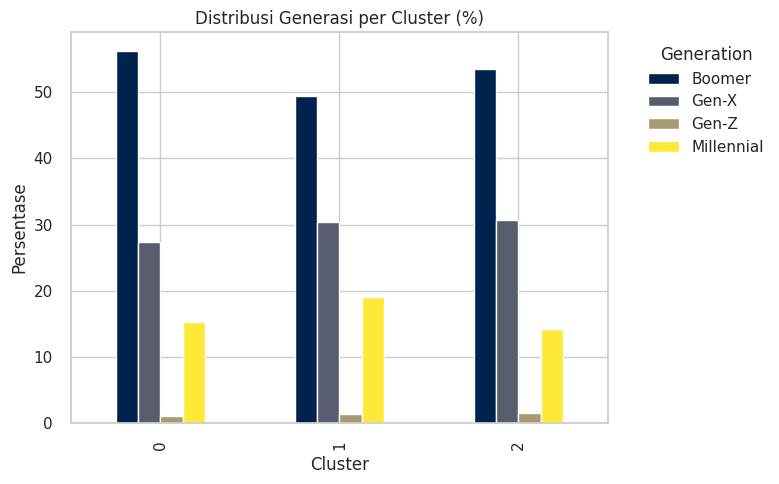

In [450]:
generation_dist = df_clustered.groupby(['cluster', 'generation']).size().unstack().fillna(0)
generation_dist_percent = generation_dist.div(generation_dist.sum(axis=1), axis=0) * 100

generation_dist_percent.plot(kind='bar', figsize=(8, 5), colormap='cividis')
plt.title('Distribusi Generasi per Cluster (%)')
plt.ylabel('Persentase')
plt.xlabel('Cluster')
plt.legend(title='Generation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

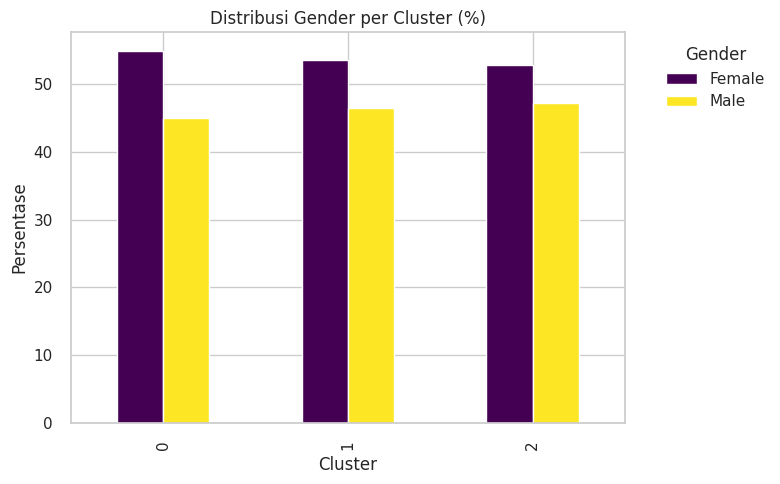

In [451]:
# Asumsikan df_clustered memiliki kolom 'cluster' dan 'gender'
gender_dist = df_clustered.groupby(['cluster', 'gender']).size().unstack().fillna(0)
gender_dist_percent = gender_dist.div(gender_dist.sum(axis=1), axis=0) * 100

gender_dist_percent.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Distribusi Gender per Cluster (%)')
plt.ylabel('Persentase')
plt.xlabel('Cluster')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

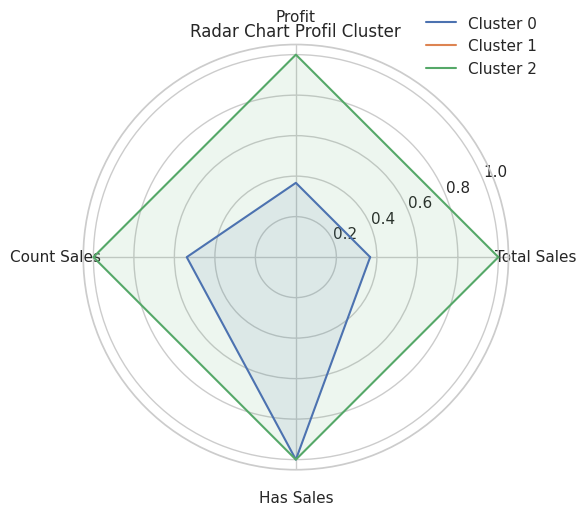

In [478]:
from math import pi

# Asumsikan cluster_summary sudah tersedia dari sebelumnya
# Pilih kolom-kolom yang akan divisualisasikan
radar_data = cluster_summary[['total_sales_mean', 'profit_mean', 'count_sales_mean', 'has_sales_<lambda>']]
radar_data.columns = ['Total Sales', 'Profit', 'Count Sales', 'Has Sales']
radar_data.index = radar_data.index.astype(str)

# Normalisasi 0-1 agar radar chart seimbang
radar_norm = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())
radar_norm['Cluster'] = radar_norm.index

# Bentuk data untuk radar chart
categories = list(radar_norm.columns[:-1])
N = len(categories)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, row in radar_norm.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories)
plt.title('Radar Chart Profil Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()


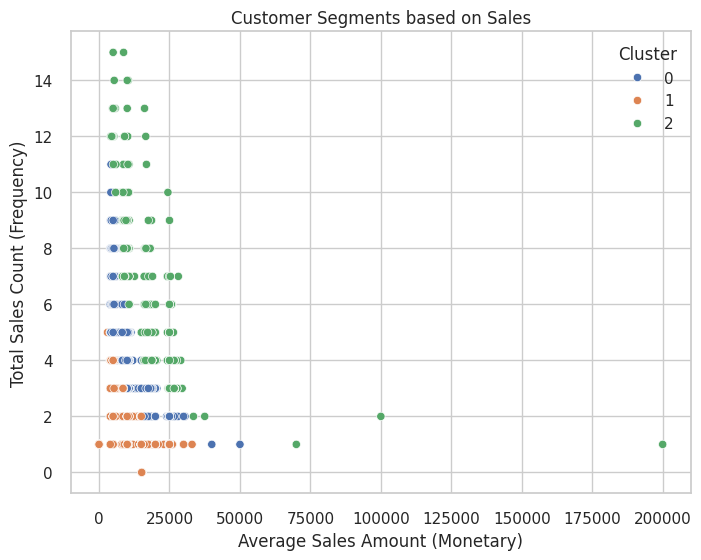

In [453]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_sales_L36M', y='cnt_sales_L36M', hue='cluster', data=df_clustered, palette='deep') # Changed data to df_clustered
plt.xlabel('Average Sales Amount (Monetary)')
plt.ylabel('Total Sales Count (Frequency)')
plt.title('Customer Segments based on Sales')
plt.legend(title="Cluster")
plt.show()